
Generated Data:
Year  Total Reduction  Reduction due to Lower Energy Transportation  Reduction due to Switch to Non-Fossil Energy
2024        12.183773                                     12.183773                                     12.183773
2025        12.142323                                     12.151466                                     12.174629
2026        11.949296                                     12.001019                                     12.132050
2027        11.537631                                     11.680162                                     12.041241
2028        10.857372                                     11.149960                                     11.891184
2029         9.866645                                     10.377776                                     11.672642
2030         8.528641                                      9.334920                                     11.377494


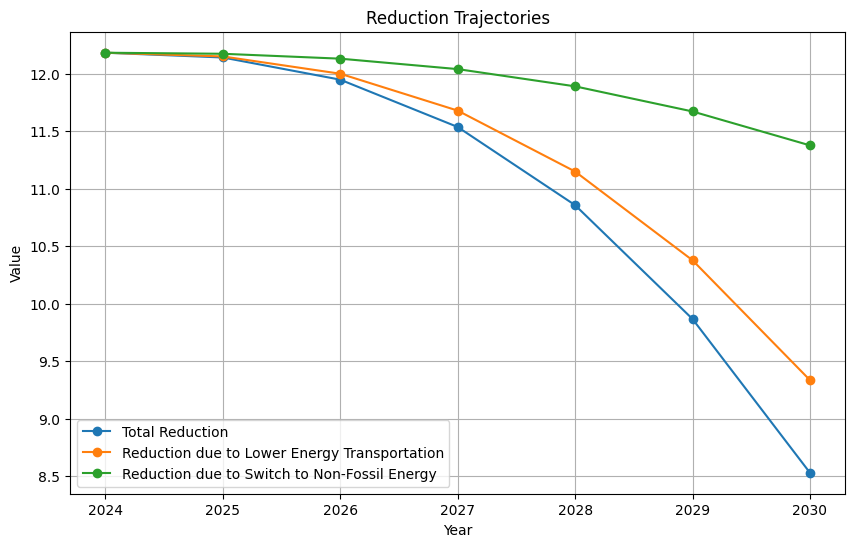

Data exported to Excel file: reduction_trajectory.xlsx


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate values based on the power function
def generate_values(start_value, end_value, start_year, end_year, exponent):
    years = np.arange(start_year, end_year + 1)
    t0 = start_year
    T = end_year
    s = (years - t0) / (T - t0)
    values = start_value - (start_value - end_value) * s ** exponent
    return years, values

# Input start and end years
start_year = 2024
end_year = 2030

# Input start and end values for Total Reduction
total_reduction_start = 12.18377282
total_reduction_end = total_reduction_start * 0.70

# Calculate delta_total_reduction
delta_total_reduction = total_reduction_start - total_reduction_end

# Use the ratio from your data to calculate delta_rlet and delta_rsnfe
ratio = 3.533333  # Derived from delta_rlet / delta_rsnfe
delta_rsnfe = delta_total_reduction / (1 + ratio)
delta_rlet = delta_total_reduction - delta_rsnfe

# Compute rlet_end and rsnfe_end
rlet_end = total_reduction_start - delta_rlet
rsnfe_end = total_reduction_start - delta_rsnfe

# Exponent for the curve shape
exponent = 2.5  # Adjust this value if needed

# Generate values for each column
years, total_reduction = generate_values(
    total_reduction_start, total_reduction_end, start_year, end_year, exponent
)
_, rlet = generate_values(
    total_reduction_start, rlet_end, start_year, end_year, exponent
)
_, rsnfe = generate_values(
    total_reduction_start, rsnfe_end, start_year, end_year, exponent
)

# Create a DataFrame to store the results
# Convert the Year column to string
data = {
    'Year': years.astype(str),  # Convert years to string to ensure it's exported as text
    'Total Reduction': total_reduction,
    'Reduction due to Lower Energy Transportation': rlet,
    'Reduction due to Switch to Non-Fossil Energy': rsnfe,
}
df = pd.DataFrame(data)

# Export to Excel
output_filename = "reduction_trajectory.xlsx"
df.to_excel(output_filename, index=False)

# Display the table
print("\nGenerated Data:")
print(df.to_string(index=False))

# Plot the graphs
plt.figure(figsize=(10, 6))

plt.plot(years, total_reduction, label='Total Reduction', marker='o')
plt.plot(
    years, rlet, label='Reduction due to Lower Energy Transportation', marker='o'
)
plt.plot(
    years,
    rsnfe,
    label='Reduction due to Switch to Non-Fossil Energy',
    marker='o',
)

plt.title('Reduction Trajectories')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print(f"Data exported to Excel file: {output_filename}")

